**What is Outlier?**

An Outlier is a data item/object that deviates significantly from the rest of the (so-called normal) objects. Identifying outliers is important in statistics and data analysis because they can have a significant impact on the results of statistical analyses. The analysis for outlier detection is referred to as outlier mining.

Outliers can skew the mean (average) and affect measures of central tendency, as well as influence the results of tests of statistical significance.

**How Outliers are Caused?**

Outliers can be caused by a variety of factors, and they often result from genuine variability in the data or from errors in data collection, measurement, or recording. Some common causes of outliers are:

**Measurement errors**: Errors in data collection or measurement processes can lead to outliers.

**Sampling errors**:
In some cases, outliers can arise due to issues with the sampling process.

**Natural variability**: Inherent variability in certain phenomena can also lead to outliers. Some systems may exhibit extreme values due to the nature of the process being studied.

**Data entry errors**: Human errors during data entry can introduce outliers.

**Experimental errors**: In experimental settings, anomalies may occur due to uncontrolled factors, equipment malfunctions, or unexpected events.

**Sampling from multiple populations**: Data is inadvertently combined from multiple populations with different characteristics.

**Intentional outliers**: Outliers are introduced intentionally to test the robustness of statistical methods.

In [8]:
# Importing
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
diabetics = load_diabetes()

# Create the dataframe
column_name = diabetics.feature_names
df_diabetics = pd.DataFrame(diabetics.data)
df_diabetics.columns = column_name
print(df_diabetics.head())
print("Old Shape: ", df_diabetics.shape)


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
Old Shape:  (442, 10)


**Outlier identification using box plot**

<Axes: ylabel='bmi'>

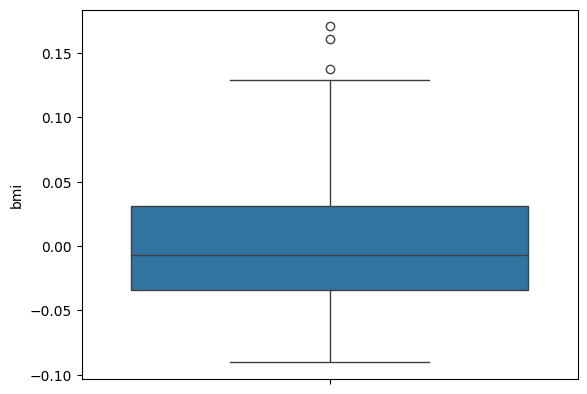

In [2]:
import seaborn as sns
sns.boxplot(df_diabetics['bmi'])

**Outlier treatment using threshold**

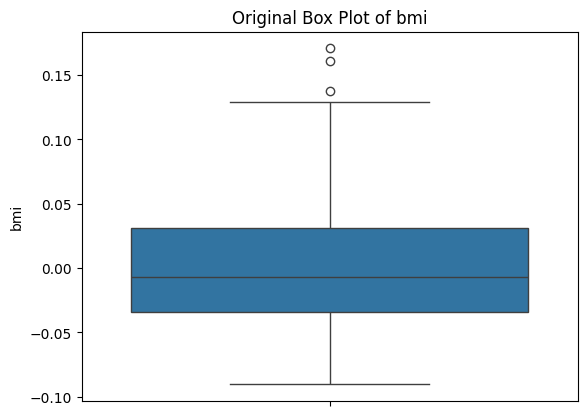

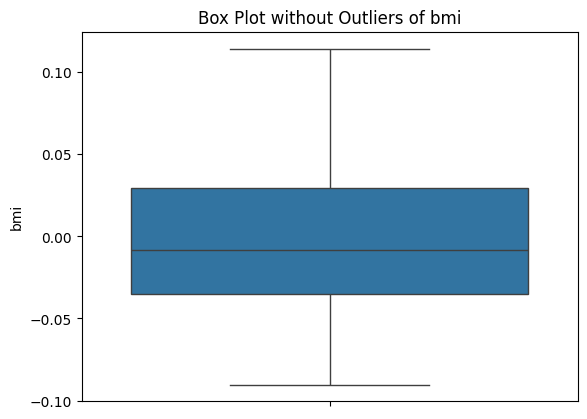

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

def removal_box_plot(df, column, threshold):
	sns.boxplot(df[column])
	plt.title(f'Original Box Plot of {column}')
	plt.show()

	removed_outliers = df[df[column] <= threshold]

	sns.boxplot(removed_outliers[column])
	plt.title(f'Box Plot without Outliers of {column}')
	plt.show()
	return removed_outliers


threshold_value = 0.12

no_outliers = removal_box_plot(df_diabetics, 'bmi', threshold_value)


**Outlier identification and remoavl using scatter plot **

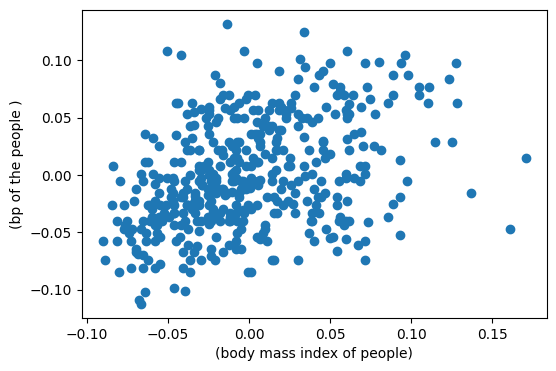

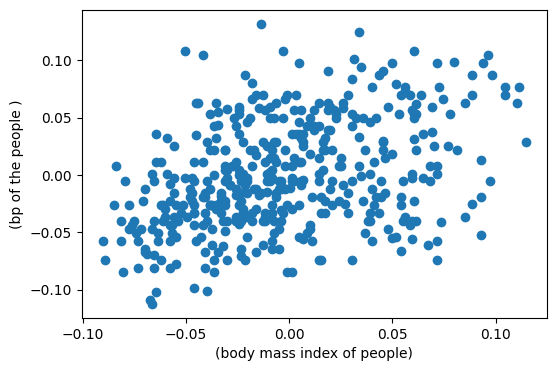

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df_diabetics['bmi'], df_diabetics['bp'])
ax.set_xlabel('(body mass index of people)')
ax.set_ylabel('(bp of the people )')
plt.show()


outlier_indices = np.where((df_diabetics['bmi'] > 0.12) & (df_diabetics['bp'] < 0.8))

no_outliers = df_diabetics.drop(outlier_indices[0])

# Scatter plot without outliers
fig, ax_no_outliers = plt.subplots(figsize=(6, 4))
ax_no_outliers.scatter(no_outliers['bmi'], no_outliers['bp'])
ax_no_outliers.set_xlabel('(body mass index of people)')
ax_no_outliers.set_ylabel('(bp of the people )')
plt.show()


**Understanding IQR**

In [6]:
# IQR
Q1 = np.percentile(df_diabetics['bmi'], 25, method='midpoint')
Q3 = np.percentile(df_diabetics['bmi'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)


0.06520763046978838


In [7]:
# Above Upper bound
upper = Q3+1.5*IQR
upper_array = np.array(df_diabetics['bmi'] >= upper)
print("Upper Bound:", upper)
print(upper_array.sum())

# Below Lower bound
lower = Q1-1.5*IQR
lower_array = np.array(df_diabetics['bmi'] <= lower)
print("Lower Bound:", lower)
print(lower_array.sum())


Upper Bound: 0.12879000811776306
3
Lower Bound: -0.13204051376139045
0


**IQR based Outlier Treatment**

In [13]:
# Importing
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd

# Load the dataset
diabetes = load_diabetes()

# Create the dataframe
column_name = diabetes.feature_names
df_diabetes = pd.DataFrame(diabetes.data)
df_diabetes .columns = column_name
df_diabetes .head()
print("Old Shape: ", df_diabetes.shape)

# IQR
# Calculate the upper and lower limits
Q1 = df_diabetes['bmi'].quantile(0.25)
Q3 = df_diabetes['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df_diabetes['bmi'] >= upper)[0]
lower_array = np.where(df_diabetes['bmi'] <= lower)[0]

# Removing the outliers
df_diabetes.drop(index=upper_array, inplace=True)
df_diabetes.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df_diabetes.shape)


Old Shape:  (442, 10)
New Shape:  (439, 10)


In [1]:
import matplotlib.pyplot as plt
sample= [15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]

#detecting
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(sample)
print("Outliers from IQR method: ", sample_outliers)

In [11]:
# Trimming
def remove_outliers(sample, outliers):
    for outlier in outliers:
        sample = np.delete(sample, np.where(sample == outlier)[0])
    return sample

In [12]:
sample_outliers = detect_outliers_iqr(sample)
print("Outliers from IQR method: ", sample_outliers)
sample = remove_outliers(sample, sample_outliers)
print("Sample after removing outliers:", sample)

Outliers from IQR method:  [101, 101, 101]
Sample after removing outliers: [15 18  7 13 16 11 21  5 15 10  9]


<ipython-input-11-42245eb604fd>:4: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  sample = np.delete(sample, np.where(sample == outlier)[0])


Text(0.5, 0, 'Sample')

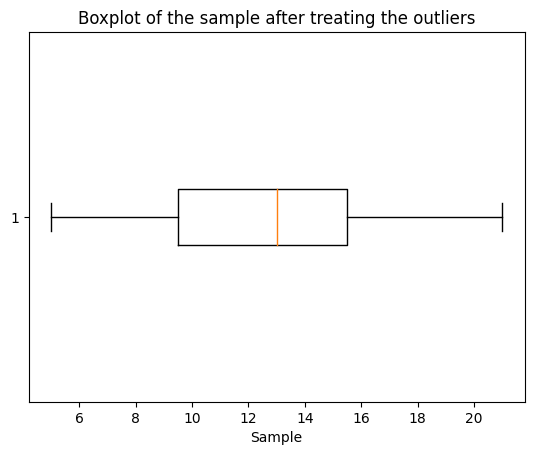

In [39]:
plt.boxplot(sample, vert=False)
plt.title("Boxplot of the sample after treating the outliers")
plt.xlabel("Sample")

**Flooring and Capping the Outliers**

In [18]:
# Computing 10th, 90th percentiles and replacing the outlier treatment in python
tenth_percentile = np.percentile(sample, 10)
ninetieth_percentile = np.percentile(sample, 90)
# print(tenth_percentile, ninetieth_percentile)
b = np.where(sample<tenth_percentile, tenth_percentile, sample)
b = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
# print("Sample:", sample)
print("New array:",b)

New array: [15.  20.7 18.   7.2 13.  16.  11.  20.7  7.2 15.  10.   9. ]


**Imputing outliers by median**

14.0
Outliers from IQR method:  [101]
Sample after replacing outliers with median:  [15, 14.0, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]


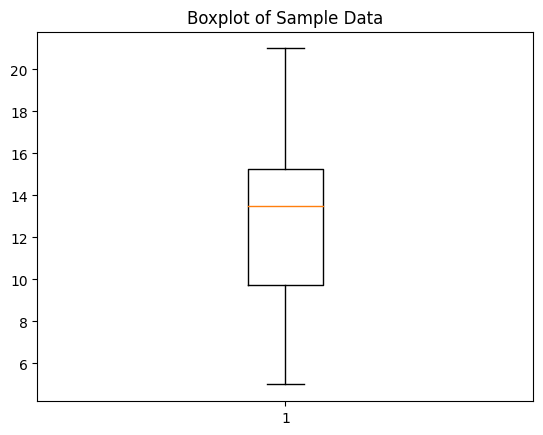

In [13]:
import numpy as np
import matplotlib.pyplot as plt

sample = [15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]
median = np.median(sample)
print(median)

def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3 - q1
    lwr_bound = q1 - (1.5 * IQR)
    upr_bound = q3 + (1.5 * IQR)
    outliers = []
    for i in data:
        if i < lwr_bound or i > upr_bound:
            outliers.append(i)
    return outliers

def replace_outliers_with_median(sample, outliers):
    for i, value in enumerate(sample):
        if value in outliers:
            sample[i] = median
    return sample

sample_outliers = detect_outliers_iqr(sample)
print("Outliers from IQR method: ", sample_outliers)

sample = replace_outliers_with_median(sample, sample_outliers)
print("Sample after replacing outliers with median: ", sample)

# Visualization
plt.boxplot(sample)
plt.title("Boxplot of Sample Data")
plt.show()